# CPU & MEM aggregation

In [1]:
import re
import glob
import ntpath
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

Processing master.log ...
Processing node1.log ...
Processing node2.log ...


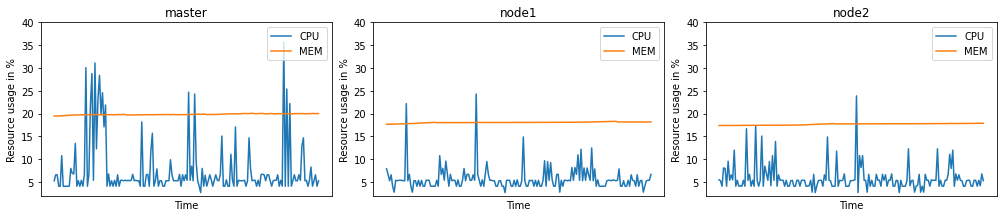

In [2]:
files = ["master.log", "node1.log", "node2.log"]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 3))
fig.tight_layout()

index = 0
for log_file in files:
    print(f'Processing {log_file} ...')
    with open(log_file) as f:
        name = ntpath.basename(log_file).split('.')[0]
        lines = f.readlines()
        data = {'CPU': [], 'MEM': []}

        for chunk in [lines[x:x+6] for x in range(0, len(lines), 6)]:
            result = re.search('ni, (.*) id', chunk[3])
            data['CPU'].append( 100 - float(result.group(1)) )
            
            used = float(re.search('free,(.*)used,', chunk[4]).group(1))
            total = float(re.search('MiB Mem :(.*)total,', chunk[4]).group(1))
            data['MEM'].append( (used / total) * 100 )

        df = pd.DataFrame(data)
        ax = axes[index]
        ax.plot(df, label=df.columns)
        ax.set_xticks([])
        ax.set_ylim(ymin=2, ymax=40)
        ax.set_ylabel("Resource usage in %")
        ax.set_xlabel("Time")
        ax.set_title(name)
        ax.legend(loc="upper right")
    index += 1

fig.savefig(fname=f'./plots/results.png')